# Replicating [Simple Black-box Adversarial Attacks](https://arxiv.org/pdf/1905.07121.pdf)

This notebook uses the replicate of the Simple Black-box Adversarial attack proposed by Guo et al. [More explanation]

Folder of the ImageNet ILSVRC2012 validation dataset, its labels in the meta data. Note: After accessing [login-access to the ImagNet website](https://image-net.org/signup.php), go to the [ImageNet 2012 version](https://image-net.org/challenges/LSVRC/2012/2012-downloads.php) and download
* Development kit (Task 1 & 2). 2.5MB. - containing the labels and the meta data
* Validation images (all tasks). 6.3GB. - the validation images

Extract both and assign the locations of the folder and files to the corresponding Constants:

In [1]:
IMAGE_FOLDER = "data/val"
LABEL_FILE = "data/ILSVRC2012_devkit_t12/data/ILSVRC2012_validation_ground_truth.txt"
META_FILE = "data/ILSVRC2012_devkit_t12/data/meta.mat"

Let's load the meta data (mapping image id to label).

In [2]:
from mat4py import loadmat
import pandas as pd

meta = pd.DataFrame.from_dict(loadmat(META_FILE)["synsets"])

Let's get the data.

In [3]:
from imagenet import ImageNetDataSet

dataset = ImageNetDataSet(image_root=IMAGE_FOLDER, label_file=LABEL_FILE)

And let's see if everything worked out as expected.

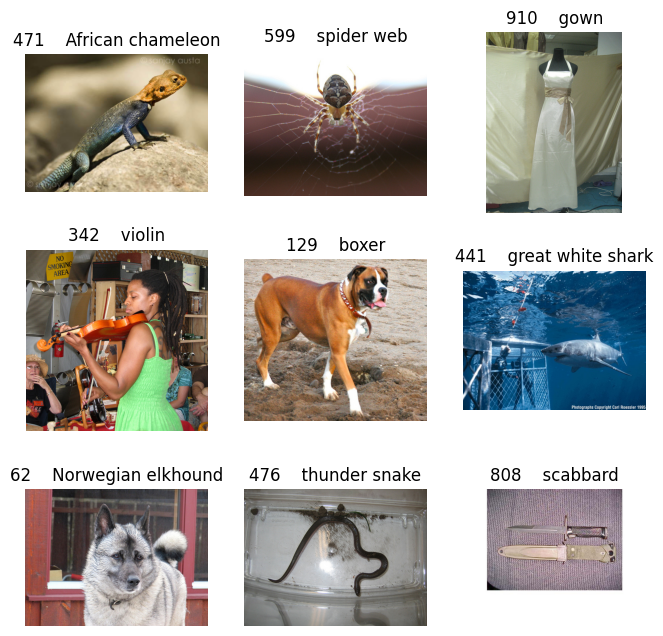

In [6]:
import torch
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(meta.loc[meta["ILSVRC2012_ID"] == int(label), "words"].to_string().split(",")[0])
    plt.axis("off")
    plt.imshow(img)
plt.show()